## Importar librerías

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
from datetime import datetime
from seaborn import boxplot
from seaborn import distplot
from tsmoothie.utils_func import sim_randomwalk, sim_seasonal_data
from tsmoothie.smoother import *
from statsmodels.tsa.stattools import adfuller
sns.set()

## Importar dataframe variables económicas

In [9]:
df_var1 = pd.read_csv(r"Datos en bruto\Data variables economicas.csv")
df_var1['Fecha'] = pd.to_datetime(df_var1['Fecha'])                      
df_var1  = df_var1[['Fecha','Futuros','Precio Interno ($/125 Kg)','TRM']]
df_var1.set_index('Fecha', inplace=True)
df_var1.head()

,Futuros,Precio Interno ($/125 Kg),TRM
Fecha,,,
2022-07-06,219.20,2302000.0,4259.86
2022-07-05,221.05,2280000.0,4198.77
2022-07-04,NaN,2270000.0,4198.77
2022-07-03,NaN,2270000.0,4198.77
2022-07-02,NaN,2270000.0,4198.77


## Importar dataframe índices de la covid

In [14]:
df_ind = pd.read_csv(r"Datos en bruto/Todo_durante.csv")
df_ind = df_ind[['Fecha', 'PANIC_INDEX', 'MEDIA_HYPE_INDEX', 'FAKE_NEWS_INDEX', 'SENTIMENT_INDEX']]
df_ind['Fecha'] = pd.to_datetime(df_ind['Fecha'])
df_ind.set_index('Fecha', inplace=True)
df_ind.head()

,PANIC_INDEX,MEDIA_HYPE_INDEX,FAKE_NEWS_INDEX,SENTIMENT_INDEX
Fecha,,,,
2022-07-06,0.52,27.93,0.00,-7.87
2022-07-05,0.48,38.21,0.12,-4.97
2022-07-04,0.54,31.37,0.27,-5.85
2022-07-03,0.42,7.76,0.00,-3.67
2022-07-02,4.66,25.71,0.19,-3.56


## Imputación de datos 

In [4]:
### Count de índices de la covid-19
df_ind.count()

PANIC_INDEX         918
MEDIA_HYPE_INDEX    918
FAKE_NEWS_INDEX     918
SENTIMENT_INDEX     918
dtype: int64

In [5]:
### Count de variables económicas
df_var1.count()

Futuros                      3198
Precio Interno ($/125 Kg)    4561
TRM                          4571
dtype: int64

In [6]:
### Imputación de datos - Fututros Café Colombiano
dfimp_fut = df_var1[['Futuros']].fillna(method='bfill');

### Imputación de datos - Precio Interno ($/125 Kg)
dfimp_precio = df_var1[['Precio Interno ($/125 Kg)']].interpolate(method='time');

## Dimensiones después de la imputación

In [7]:
df_var = pd.concat([df_var1[['TRM']], dfimp_fut , dfimp_precio ], axis=1)
df_var.count()

TRM                          4571
Futuros                      4571
Precio Interno ($/125 Kg)    4571
dtype: int64

## Análisis exploratorio

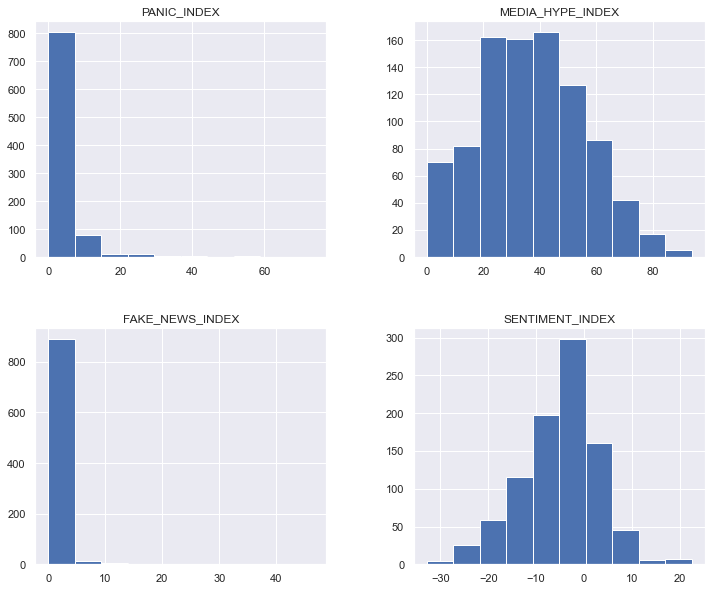

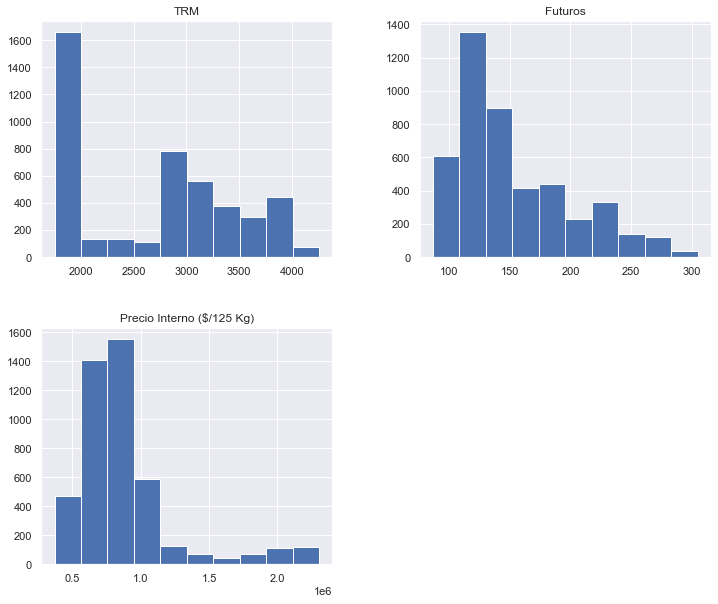

In [8]:
### índeices de la covid
df_ind.hist(figsize=(12,10));

### variables económicas
df_var.hist(figsize=(12,10));


In [9]:
### descripción de las variables económicas 
df_var.describe()

,TRM,Futuros,Precio Interno ($/125 Kg)
count,4571.000000,4571.000000,4.571000e+03
mean,2704.947027,152.435887,8.876609e+05
std,750.424044,46.740203,3.732993e+05
min,1748.410000,86.650000,3.695000e+05
25%,1902.450000,118.625000,7.000000e+05
50%,2887.160000,136.500000,7.917500e+05
75%,3286.830000,179.690000,9.500000e+05
max,4259.860000,304.900000,2.307000e+06


In [10]:
### descripción de los índices de la covid
df_ind.describe()

,PANIC_INDEX,MEDIA_HYPE_INDEX,FAKE_NEWS_INDEX,SENTIMENT_INDEX
count,918.000000,918.000000,918.000000,918.000000
mean,3.834401,36.964292,0.923115,-4.954336
std,6.461003,18.607859,2.861200,8.010973
min,0.000000,0.000000,0.000000,-32.820000
25%,0.830000,24.280000,0.100000,-9.907500
50%,1.790000,36.260000,0.350000,-3.765000
75%,4.100000,49.667500,0.750000,0.017500
max,73.530000,93.770000,46.490000,22.520000


### Vista de series temporales 

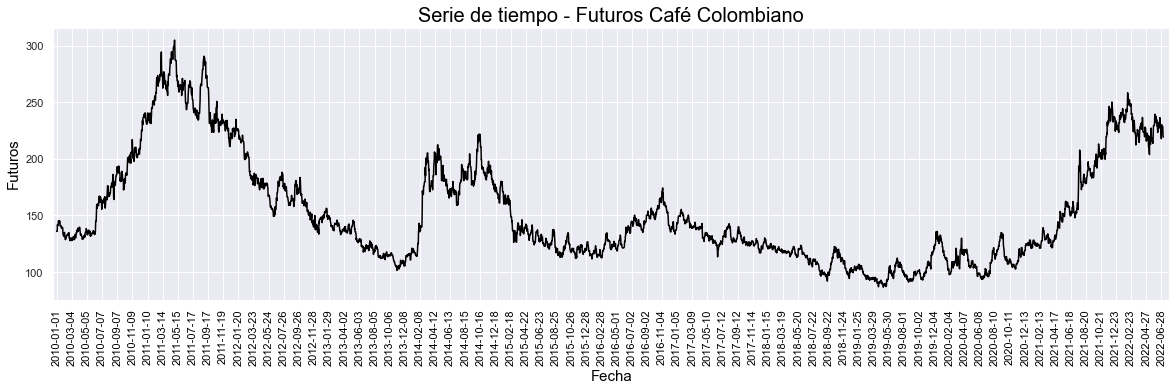

In [11]:
### Futuros
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data= df_var['Futuros'], color='black')
plt.xlabel("Fecha", fontsize=15, color="black") 
plt.ylabel("Futuros", fontsize=15, color="black")
plt.title('Serie de tiempo - Futuros Café Colombiano', fontsize=20, color="black")
plt.xticks (pd.date_range (start='2010-01-01',end= '2022-08-30', periods=75), rotation=90, color='black')
ax.set_xbound(lower=14595, upper= 19203)
plt.show()

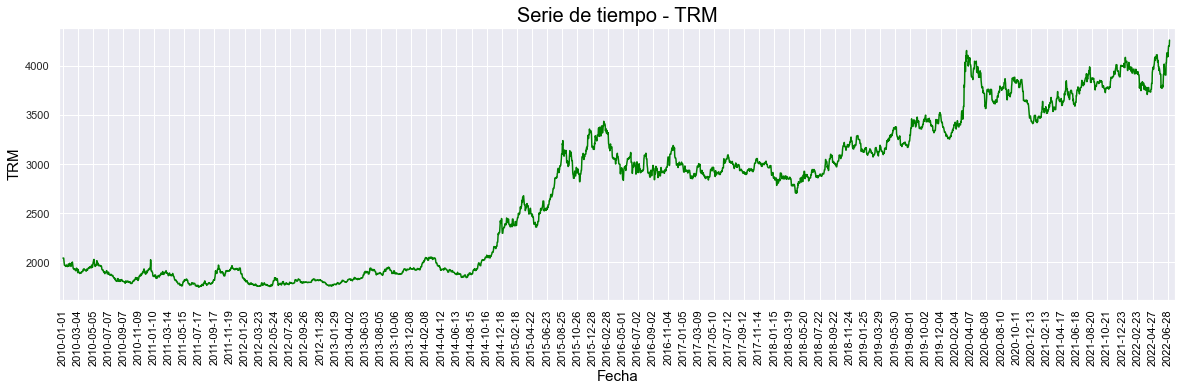

In [12]:
### TRM
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot( data = df_var["TRM"], color='green')
plt.xlabel("Fecha", fontsize=15, color="black") 
plt.ylabel("TRM", fontsize=15, color="black")
plt.title('Serie de tiempo - TRM', fontsize=20, color="black")
plt.xticks (pd.date_range (start='2010-01-01',end= '2022-08-30', periods=75), rotation=90, color='black')
ax.set_xbound(lower=14595, upper= 19203)
plt.show()

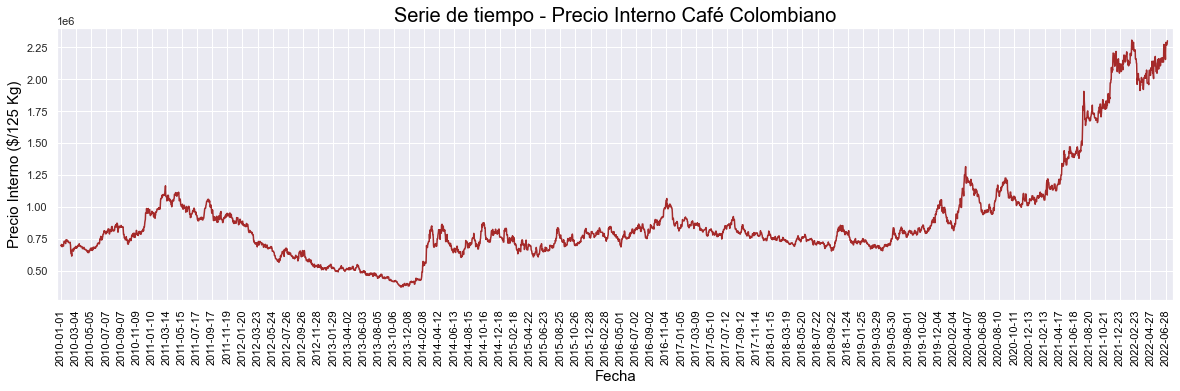

In [13]:
### Precio interno del café
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot( data = df_var["Precio Interno ($/125 Kg)"], color='brown')
plt.xlabel("Fecha", fontsize=15, color="black") 
plt.ylabel("Precio Interno ($/125 Kg)", fontsize=15, color="black")
plt.title('Serie de tiempo - Precio Interno Café Colombiano', fontsize=20, color="black")
plt.xticks (pd.date_range (start='2010-01-01',end= '2022-08-30', periods=75), rotation=90, color='black')
ax.set_xbound(lower=14595, upper= 19203)
plt.show()

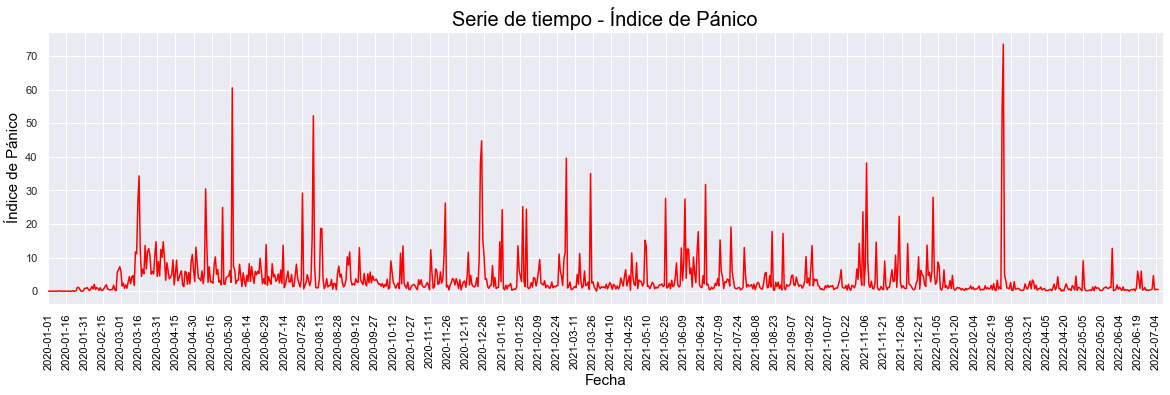

In [14]:
### Índice de Pánico
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = df_ind['PANIC_INDEX'], color='red')
plt.xlabel("Fecha", fontsize=15, color="black") 
plt.ylabel("Índice de Pánico", fontsize=15, color="black")
plt.title('Serie de tiempo - Índice de Pánico', fontsize=20, color="black")
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19183)
plt.show()

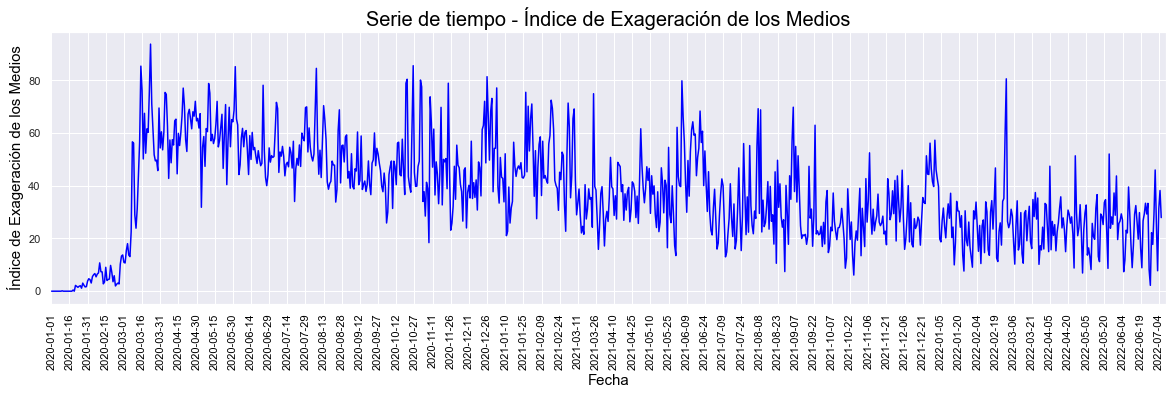

In [15]:
### Índice de Exageración de los Medios
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = df_ind["MEDIA_HYPE_INDEX"], color='blue')
plt.xlabel("Fecha", fontsize=15, color="black") 
plt.ylabel("Índice de Exageración de los Medios", fontsize=15, color="black")
plt.title('Serie de tiempo - Índice de Exageración de los Medios', fontsize=20, color="black")
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19183)
plt.show()

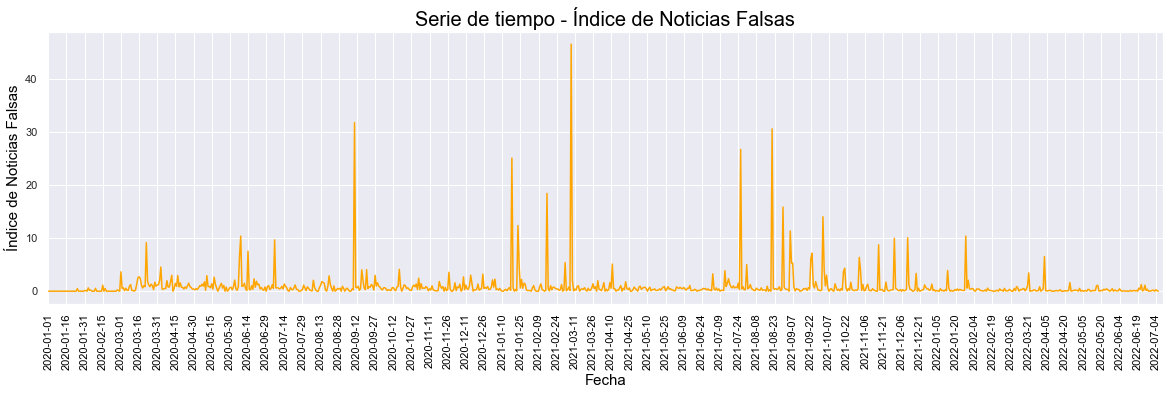

In [16]:
### Índice de Noticias Falsas
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = df_ind["FAKE_NEWS_INDEX"], color='orange')
plt.xlabel("Fecha", fontsize=15, color="black") 
plt.ylabel("Índice de Noticias Falsas", fontsize=15, color="black")
plt.title('Serie de tiempo - Índice de Noticias Falsas', fontsize=20, color="black")
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19183)
plt.show()

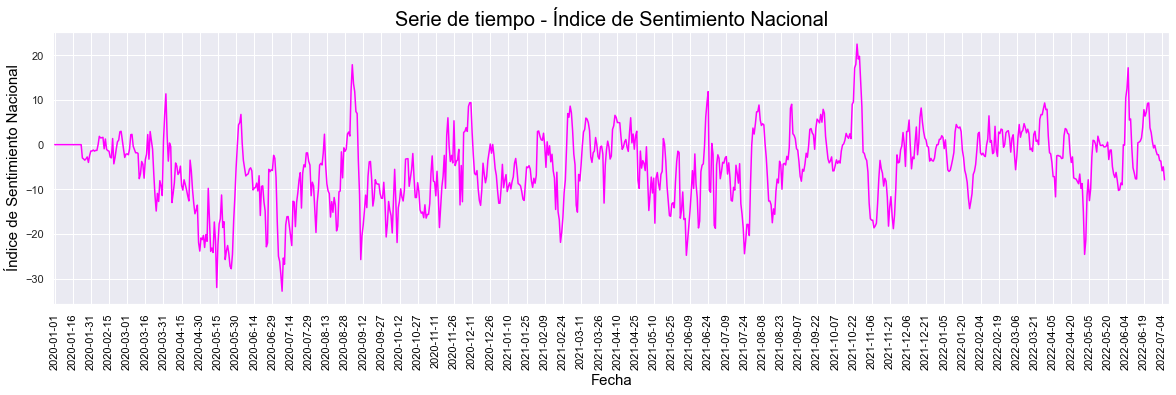

In [17]:
### Índice de Sentimiento Nacional
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = df_ind["SENTIMENT_INDEX"], color='magenta')
plt.xlabel("Fecha", fontsize=15, color="black") 
plt.ylabel("Índice de Sentimiento Nacional", fontsize=15, color="black")
plt.title('Serie de tiempo - Índice de Sentimiento Nacional', fontsize=20, color="black")
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19183)
plt.show()

## Normalización de datos

In [18]:
### Normalización variables económicas
dfnorm_var = (df_var-df_var.min())/(df_var.max()-df_var.min())
dfnorm_var.describe()

,TRM,Futuros,Precio Interno ($/125 Kg)
count,4571.000000,4571.000000,4571.000000
mean,0.380870,0.301424,0.267438
std,0.298801,0.214159,0.192671
min,0.000000,0.000000,0.000000
25%,0.061335,0.146506,0.170581
50%,0.453423,0.228408,0.217935
75%,0.612562,0.426300,0.299613
max,1.000000,1.000000,1.000000


In [19]:
### Normalización índices de la covid
dfnorm_ind = (df_ind-df_ind.min())/(df_ind.max()-df_ind.min())
dfnorm_ind.describe()

,PANIC_INDEX,MEDIA_HYPE_INDEX,FAKE_NEWS_INDEX,SENTIMENT_INDEX
count,918.000000,918.000000,918.000000,918.000000
mean,0.052147,0.394202,0.019856,0.503536
std,0.087869,0.198441,0.061544,0.144759
min,0.000000,0.000000,0.000000,0.000000
25%,0.011288,0.258931,0.002151,0.414031
50%,0.024344,0.386691,0.007529,0.525027
75%,0.055760,0.529674,0.016133,0.593377
max,1.000000,1.000000,1.000000,1.000000


## Índice de volatilidad

In [20]:
vol = df_var[['Futuros']]
vol = abs(np.log(vol / vol.shift(-1)))*100
vol = vol.fillna(0)

vol_norm = (vol-vol.min())/(vol.max()-vol.min())
vol1_norm = vol_norm.loc['2022-07-06':'2019-12-31']
vol1 = vol.query("Fecha > '2019-12-31' and Fecha <= '2022-07-06'")
vol2 = vol.query("Fecha > '2009-12-31' and Fecha <= '2019-12-31'")

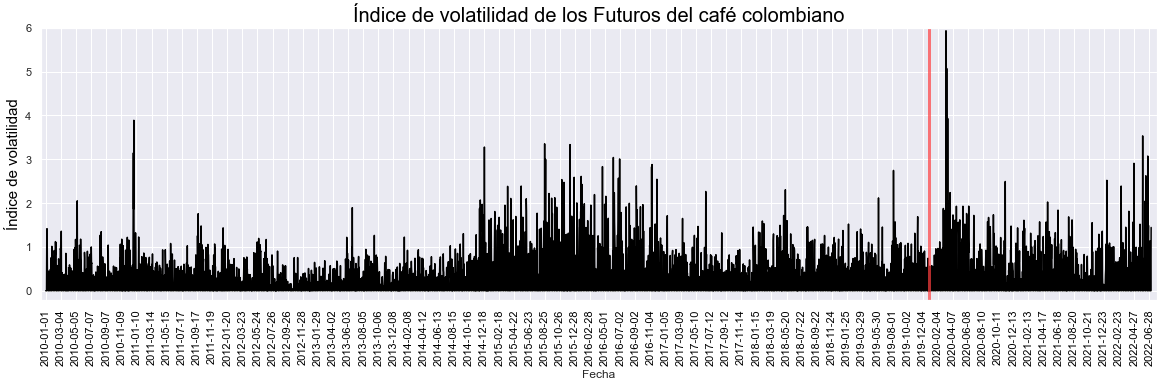

In [24]:
vol = df_var[['TRM']]
vol = abs(np.log(vol / vol.shift(-1)))*100
vol = vol.fillna(0)

### Gráfico índice de volatilidad
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = vol['TRM'], color='black')
plt.ylabel("Índice de volatilidad", fontsize=15, color="black")
plt.title('Índice de volatilidad de los Futuros del café colombiano', fontsize=20, color="black")
plt.xticks (pd.date_range (start='2010-01-01',end= '2022-08-30', periods=75), rotation=90, color='black')
ax.axvline(x= 18261, ymin = 0.0, ymax = 13, color = '#ff4040', lw= 3, alpha = 0.7)
ax.set_xbound(lower=14590, upper= 19203)
ax.set_ylim(ymin=-0.2, ymax = 6)
plt.show()

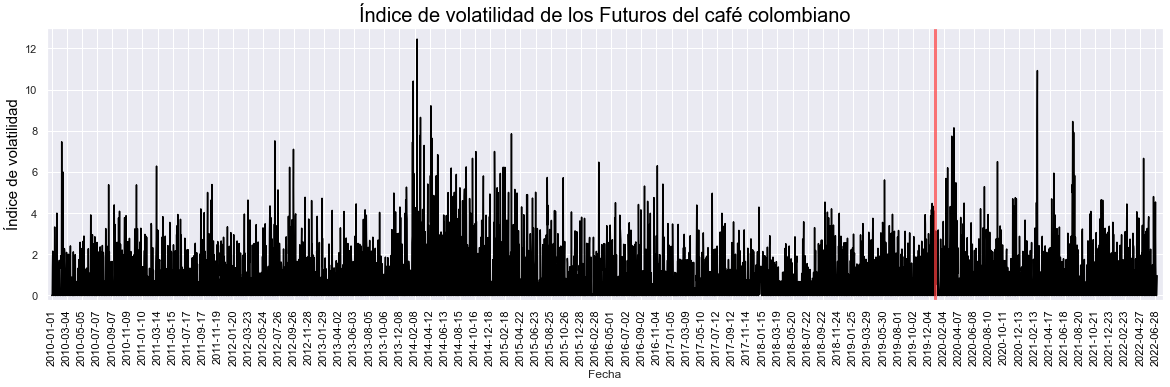

In [29]:
vol = df_var[['Precio Interno ($/125 Kg)']]
vol = abs(np.log(vol / vol.shift(-1)))*100
vol = vol.fillna(0)

### Gráfico índice de volatilidad
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = vol['Precio Interno ($/125 Kg)'], color='black')
plt.ylabel("Índice de volatilidad", fontsize=15, color="black")
plt.title('Índice de volatilidad de los Futuros del café colombiano', fontsize=20, color="black")
plt.xticks (pd.date_range (start='2010-01-01',end= '2022-08-30', periods=75), rotation=90, color='black')
ax.axvline(x= 18261, ymin = 0.0, ymax = 13, color = '#ff4040', lw= 3, alpha = 0.7)
ax.set_xbound(lower=14590, upper= 19203)
ax.set_ylim(ymin=-0.2, ymax = 13)
plt.show()

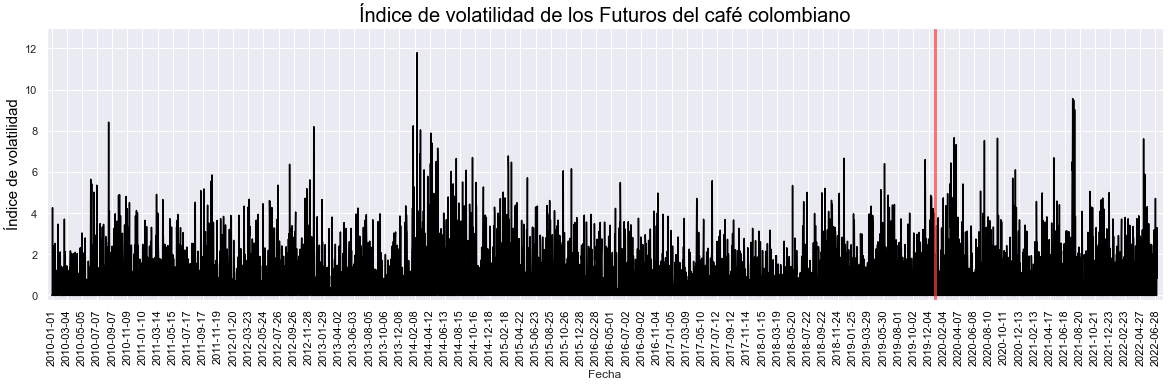

In [21]:
### Gráfico índice de volatilidad
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = vol['Futuros'], color='black')
plt.ylabel("Índice de volatilidad", fontsize=15, color="black")
plt.title('Índice de volatilidad de los Futuros del café colombiano', fontsize=20, color="black")
plt.xticks (pd.date_range (start='2010-01-01',end= '2022-08-30', periods=75), rotation=90, color='black')
ax.axvline(x= 18261, ymin = 0.0, ymax = 13, color = '#ff4040', lw= 3, alpha = 0.7)
ax.set_xbound(lower=14590, upper= 19203)
ax.set_ylim(ymin=-0.2, ymax = 13)
plt.show()

## Comparación Índice de volatilidad 

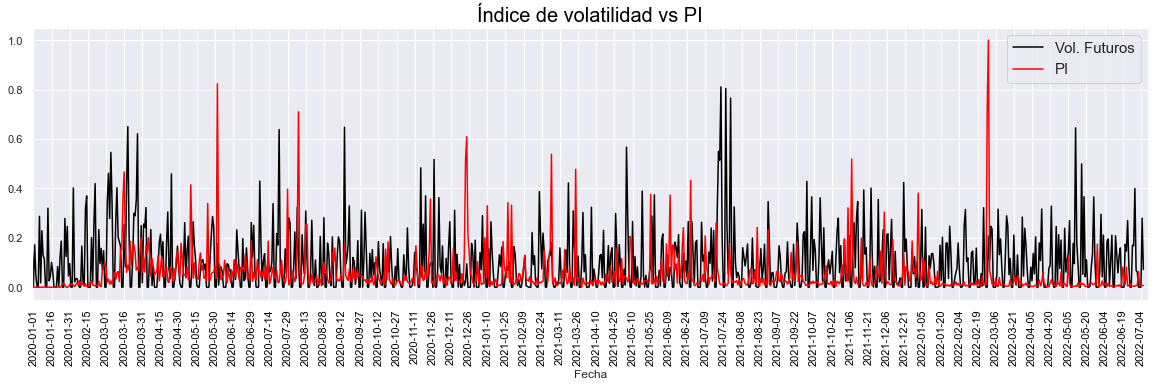

In [22]:
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = vol_norm['Futuros'], label='Vol. Futuros', color='black')
sns.lineplot(data = dfnorm_ind['PANIC_INDEX'], label='PI', color='red')
plt.ylabel("", fontsize=15, color="black")
plt.title('Índice de volatilidad vs PI', fontsize=20, color="black")
plt.legend( loc ="upper right", prop = {'size': 15}) 
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19183)
plt.show()

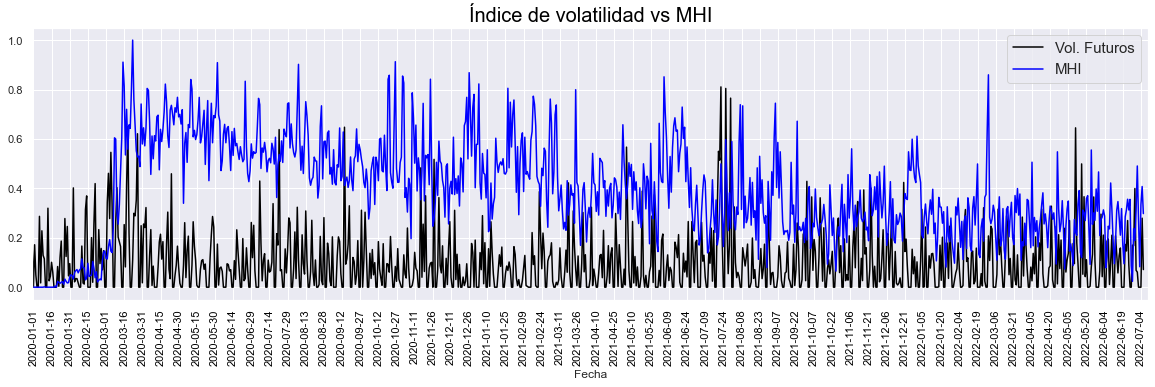

In [23]:
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = vol_norm['Futuros'], label='Vol. Futuros', color='black')
sns.lineplot(data = dfnorm_ind['MEDIA_HYPE_INDEX'], label='MHI', color='blue')
plt.ylabel("", fontsize=15, color="black")
plt.title('Índice de volatilidad vs MHI', fontsize=20, color="black")
ax.legend( prop = {'size': 15}, loc='upper right')
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19183)
plt.show()

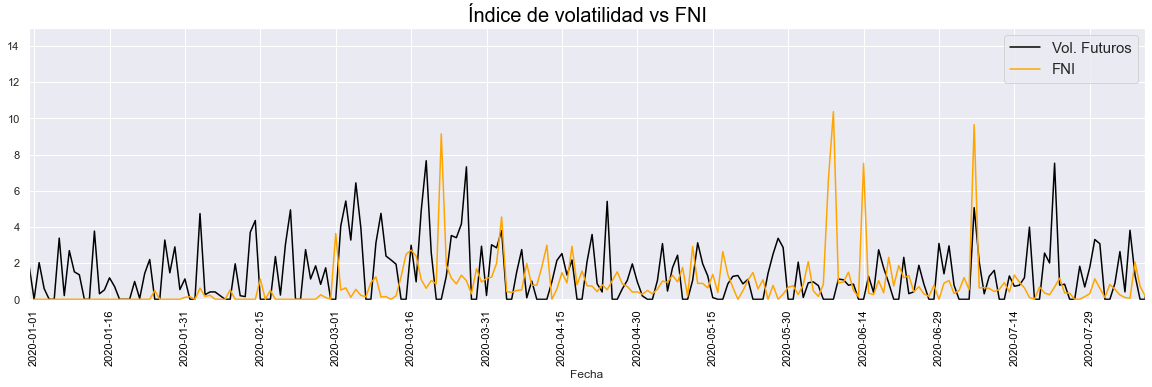

In [24]:
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = vol['Futuros'], label='Vol. Futuros', color='blacK')
sns.lineplot(data = df_ind['FAKE_NEWS_INDEX'], label='FNI', color='orange')
plt.ylabel("", fontsize=15, color="black")
plt.title('Índice de volatilidad vs FNI', fontsize=20, color="black")
ax.legend(prop = {'size': 15}, loc='upper right')
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 18483)
ax.set_ybound(lower=-0.02, upper= 15)
plt.show()

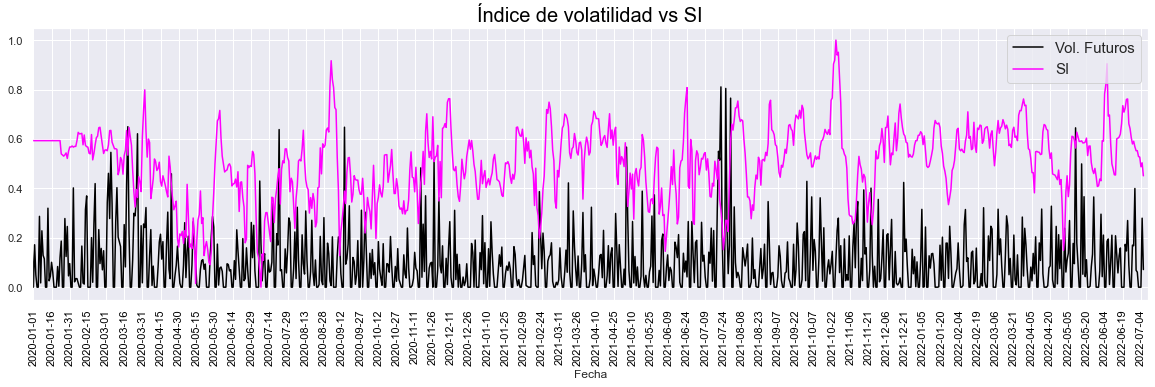

In [25]:
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = vol_norm['Futuros'], label='Vol. Futuros', color='black')
sns.lineplot(data = dfnorm_ind['SENTIMENT_INDEX'], label='SI', color='magenta')
plt.ylabel("", fontsize=15, color="black")
plt.title('Índice de volatilidad vs SI', fontsize=20, color="black")
ax.legend(prop = {'size': 15}, loc='upper right')
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19183)
plt.show()

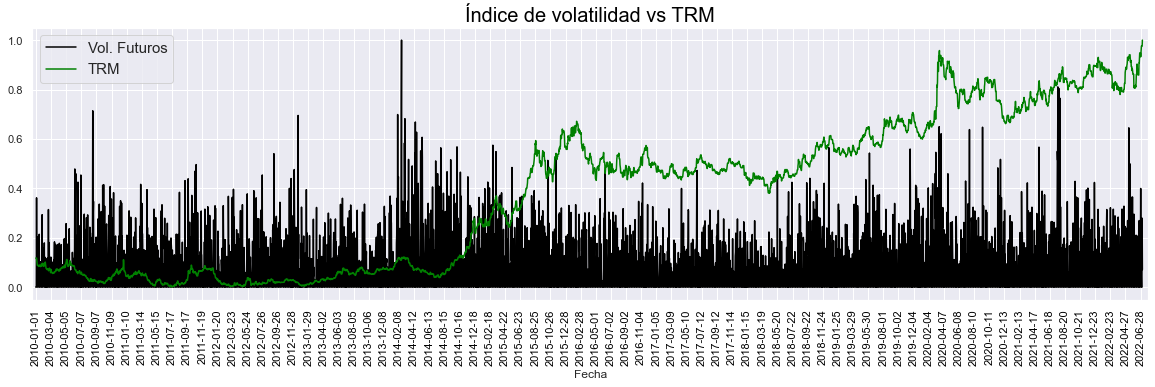

In [26]:
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = vol_norm['Futuros'], label='Vol. Futuros', color='black')
sns.lineplot(data = dfnorm_var['TRM'], label='TRM', color='green')
plt.ylabel("", fontsize=15, color="black")
plt.title('Índice de volatilidad vs TRM', fontsize=20, color="black")
ax.legend(prop = {'size': 15}, loc='upper left')
plt.xticks (pd.date_range (start='2010-01-01',end= '2022-08-30', periods=75), rotation=90, color='black')
ax.set_xbound(lower=14595, upper= 19203)
plt.show()

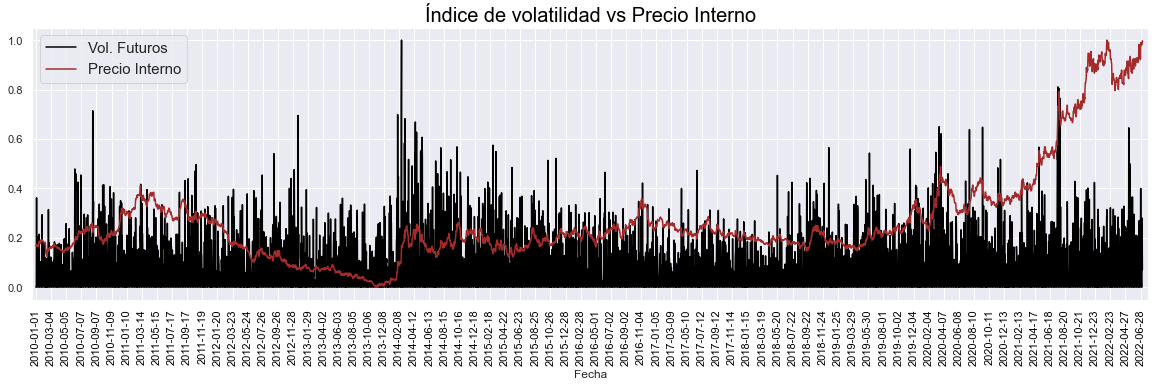

In [27]:
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = vol_norm['Futuros'], label='Vol. Futuros', color='black')
sns.lineplot(data = dfnorm_var['Precio Interno ($/125 Kg)'], label='Precio Interno', color='brown')
plt.ylabel("", fontsize=15, color="black")
plt.title('Índice de volatilidad vs Precio Interno', fontsize=20, color="black")
ax.legend(prop = {'size': 15}, loc='upper left')
plt.xticks (pd.date_range (start='2010-01-01',end= '2022-08-30', periods=75), rotation=90, color='black')
ax.set_xbound(lower=14595, upper= 19203)
plt.show()

## Series preprocesadas

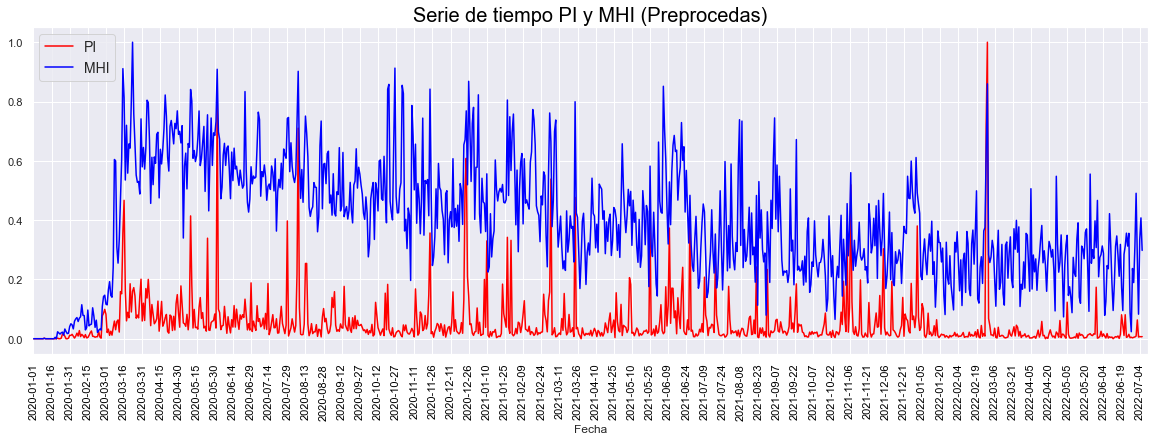

In [28]:
fig, ax = plt.subplots(figsize = (20,6))
sns.lineplot(data = dfnorm_ind['PANIC_INDEX'], color='red')
sns.lineplot(data = dfnorm_ind['MEDIA_HYPE_INDEX'], color='blue')
plt.ylabel("", fontsize=15, color="black")
plt.title('Serie de tiempo PI y MHI (Preprocedas)', fontsize=20, color="black")
ax.legend(['PI', 'MHI'], prop = {'size': 14}, loc='upper left')
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19184)
plt.show()

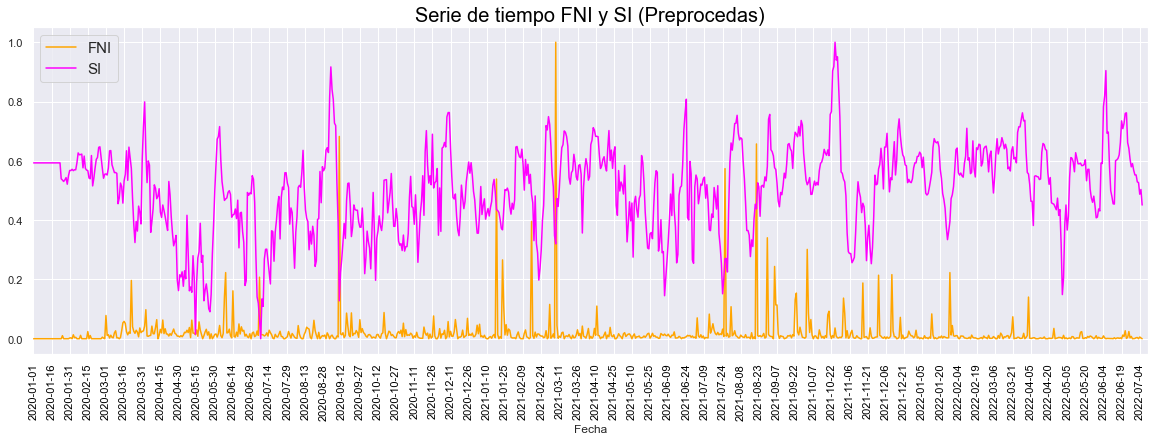

In [29]:
fig, ax = plt.subplots(figsize = (20,6))
sns.lineplot(data = dfnorm_ind['FAKE_NEWS_INDEX'], color='orange')
sns.lineplot(data = dfnorm_ind['SENTIMENT_INDEX'], color='magenta')
plt.ylabel("", fontsize=15, color="black")
plt.title('Serie de tiempo FNI y SI (Preprocedas)', fontsize=20, color="black")
ax.legend(['FNI', 'SI'], prop = {'size': 15}, loc='upper left')
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19184)
plt.show()

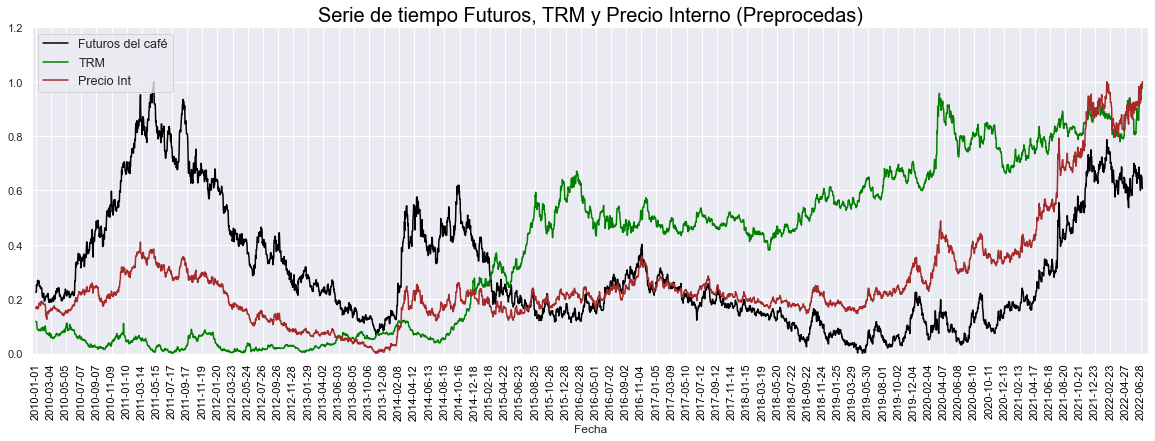

In [30]:
fig, ax = plt.subplots(figsize = (20,6))
sns.lineplot(data = dfnorm_var['Futuros'], label='Futuros del café', color='black')
sns.lineplot(data = dfnorm_var['TRM'], label='TRM', color='green')
sns.lineplot(data = dfnorm_var['Precio Interno ($/125 Kg)'], label='Precio Int', color='brown')
plt.ylabel("", fontsize=15, color="black")
plt.title('Serie de tiempo Futuros, TRM y Precio Interno (Preprocedas)', fontsize=20, color="black")
ax.legend(prop = {'size': 12.5}, loc='upper left')
plt.xticks (pd.date_range (start='2010-01-01',end= '2022-08-30', periods=75), rotation=90, color='black')
ax.set_xbound(lower=14595, upper= 19203)
ax.set_ybound(lower=0, upper= 1.2)
plt.show()

## Prueba de estacionariedad - Método: Pureba Dickey Fuller Aumentada

In [49]:
### Prueba de estacionalidad - Volatilidad Futuros del Café Colombiano

adft = adfuller(vol,autolag="t-stat")
output_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"], "Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
print('Prueba Dickey Fuller aumentada - Volatilidad Café colombiano')
print(output_df); 
print("")

if adft[1] > 0.05:
    print("La serie de tiempo de la Volatilidad de los Futuros No es estacionaria")
else:
    print("La serie de tiempo de la Volatilidad de los Futuros es estacionaria");

Prueba Dickey Fuller aumentada - Volatilidad Café colombiano
                        Metric        Values
0              Test Statistics -8.158637e+00
1                      p-value  9.272131e-13
2             No. of lags used  2.800000e+01
3  Number of observations used  4.542000e+03
4          critical value (1%) -3.431791e+00
5          critical value (5%) -2.862177e+00
6         critical value (10%) -2.567109e+00

La serie de tiempo de la Volatilidad de los Futuros es estacionaria


In [50]:
### Prueba de estacionalidad - TRM

adft = adfuller(df_var['TRM'],autolag="t-stat")
output_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"], "Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
print('Prueba Dickey Fuller aumentada - TRM')
print(output_df); 
print("")

if adft[1] > 0.05:
    print("La serie de tiempo de TRM No es estacionaria")
else:
    print("La serie de tiempo de TRM es estacionaria");

Prueba Dickey Fuller aumentada - TRM
                        Metric       Values
0              Test Statistics    -1.430474
1                      p-value     0.567582
2             No. of lags used    24.000000
3  Number of observations used  4546.000000
4          critical value (1%)    -3.431789
5          critical value (5%)    -2.862176
6         critical value (10%)    -2.567109

La serie de tiempo de TRM No es estacionaria


In [51]:
### Prueba de estacionalidad - Precio Interno del Café Colombiano

adft = adfuller(df_var['Precio Interno ($/125 Kg)'],autolag="t-stat")
output_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"], "Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
print('Prueba Dickey Fuller aumentada - Precio Interno Café ')
print(output_df); 
print("")

if adft[1] > 0.05:
    print("La serie de tiempo de Precio Interno No es estacionaria")
else:
    print("La serie de tiempo de Precio Interno es estacionaria");

Prueba Dickey Fuller aumentada - Precio Interno Café 
                        Metric       Values
0              Test Statistics    -3.533838
1                      p-value     0.007159
2             No. of lags used    32.000000
3  Number of observations used  4538.000000
4          critical value (1%)    -3.431792
5          critical value (5%)    -2.862177
6         critical value (10%)    -2.567109

La serie de tiempo de Precio Interno es estacionaria


In [52]:
### Prueba de estacionalidad - Índice de Pánico

adft = adfuller(df_ind['PANIC_INDEX'],autolag="t-stat")
output_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"], "Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
print('Prueba Dickey Fuller aumentada - PI')
print(output_df); 
print("")

if adft[1] > 0.05:
    print("La serie de tiempo de Índice de Pánico NO es estacionaria")
else:
    print("La serie de tiempo de Índice de Pánico es estacionaria");

Prueba Dickey Fuller aumentada - PI
                        Metric      Values
0              Test Statistics  -22.155576
1                      p-value    0.000000
2             No. of lags used    0.000000
3  Number of observations used  917.000000
4          critical value (1%)   -3.437501
5          critical value (5%)   -2.864697
6         critical value (10%)   -2.568451

La serie de tiempo de Índice de Pánico es estacionaria


In [53]:
### Prueba de estacionalidad - Índice de Exageración de los Medios

adft = adfuller(df_ind['MEDIA_HYPE_INDEX'],autolag="t-stat")
output_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"], "Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
print('Prueba Dickey Fuller aumentada - MHI')
print(output_df); 
print("")

if adft[1] > 0.05:
    print("La serie de tiempo de Índice de Exageración de los Medios NO es estacionaria")
else:
    print("La serie de tiempo de Índice de Exageración de los Medios es estacionaria");

Prueba Dickey Fuller aumentada - MHI
                        Metric      Values
0              Test Statistics   -2.113098
1                      p-value    0.239280
2             No. of lags used   13.000000
3  Number of observations used  904.000000
4          critical value (1%)   -3.437604
5          critical value (5%)   -2.864742
6         critical value (10%)   -2.568475

La serie de tiempo de Índice de Exageración de los Medios NO es estacionaria


In [54]:
### Prueba de estacionalidad - Índice de Noticias Falsas

adft = adfuller(df_ind['FAKE_NEWS_INDEX'],autolag="t-stat")
output_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"], "Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
print('Prueba Dickey Fuller aumentada - FNI')
print(output_df); 
print("")

if adft[1] > 0.05:
    print("La serie de tiempo de Índice de Noticias Falsas NO es estacionaria")
else:
    print("La serie de tiempo de Índice de Noticias Falsas es estacionaria");

Prueba Dickey Fuller aumentada - FNI
                        Metric      Values
0              Test Statistics   -5.422078
1                      p-value    0.000003
2             No. of lags used   19.000000
3  Number of observations used  898.000000
4          critical value (1%)   -3.437653
5          critical value (5%)   -2.864764
6         critical value (10%)   -2.568487

La serie de tiempo de Índice de Noticias Falsas es estacionaria


In [55]:
### Prueba de estacionalidad - Índice de Sentimiento Nacional 

adft = adfuller(df_ind['SENTIMENT_INDEX'],autolag="t-stat")
output_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"], "Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
print('Prueba Dickey Fuller aumentada - SI')
print(output_df); 
print("")

if adft[1] > 0.05:
    print("La serie de tiempo de Índice de Sentimiento Nacional NO es estacionaria")
else:
    print("La serie de tiempo de Índice de Sentimiento Nacional es estacionaria");

Prueba Dickey Fuller aumentada - SI
                        Metric      Values
0              Test Statistics   -3.933196
1                      p-value    0.001804
2             No. of lags used   21.000000
3  Number of observations used  896.000000
4          critical value (1%)   -3.437669
5          critical value (5%)   -2.864771
6         critical value (10%)   -2.568490

La serie de tiempo de Índice de Sentimiento Nacional es estacionaria


## Alistamiento de los datasets para el modelo

### Dataset solo volatilidad

In [ ]:
## Dataset volatilidad de los futuros colombianos 01/01/2010 - 06/07/2022
vol.head()

### Dataset solo volatilidad antes de la covid-19

In [ ]:
## Dataset volatilidad de los futuros colombianos 01/01/2010 - 31/12/2019
vol2

### Dataset solo volatilidad antes de la covid-19

In [ ]:
## Dataset volatilidad de los futuros colombianos 01/01/2020 - 06/07/2022
vol1

### Dataset completo volatilidad y variables económicas

In [ ]:
## Concatenación
## Dataset volatilidad de los futuros colombianos y variables económicas 01/01/2010 - 06/07/2022
df_todo_varvol = pd.concat([vol, df_var], axis=1)
df_todo_varvol

### Dataset antes de la covid-19 con volatilidad y varibales económicas

In [ ]:
df_var_ant = df_var.query("Fecha > '2009-12-31' and Fecha <= '2019-12-31'")
df_var_ant = df_var_ant[['TRM','Precio Interno ($/125 Kg)']]

## Concatenación
## Dataset volatilidad de los futuros colombianos y variables económicas 01/01/2010 - 31/12/2019
antes = pd.concat([vol2, df_var_ant], axis=1)
antes = antes.rename(columns = {'Futuros': 'Vol. Futuros'})
antes

### Dataset durante la covid-19 volatilidad y variables económicas

In [ ]:
df_var_dur = df_var.query("Fecha > '2019-12-31' and Fecha <= '2022-07-06'")
df_var_dur = df_var_dur[['TRM','Precio Interno ($/125 Kg)']]

## Concatenación
## Dataset volatilidad de los futuros colombianos y variables económicas 01/01/2020 - 06/07/2022
df_dur_varvol =  pd.concat([vol1, df_var_dur], axis=1)
df_dur_varvol = df_dur_varvol.rename(columns = {'Futuros': 'Vol. Futuros', 'PANIC_INDEX':'PI','MEDIA_HYPE_INDEX':'MHI','FAKE_NEWS_INDEX':'MHI','SENTIMENT_INDEX':'SI'})
df_dur_varvol

### Datsaet índices de noticias duarante la covid-19 con volatilidad 

In [ ]:
## Concatenación
## Dataset volatilidad de los futuros colombianos e índices de la covid-19 01/01/2020 - 06/07/2022
df_ind_vol = pd.concat([vol1, df_ind], axis=1)
df_ind_vol = df_ind_vol.rename(columns = {'Futuros': 'Vol. Futuros', 'PANIC_INDEX':'PI','MEDIA_HYPE_INDEX':'MHI',
                                          'FAKE_NEWS_INDEX':'FNI' ,'SENTIMENT_INDEX':'SI'})
df_ind_vol

### Dataset duarante la covid-19 con variables económica y volatilidad

In [ ]:
## Dataset volatilidad de los futuros colombianos, índices de la covid y variables económicas 01/01/2020 - 06/07/2022
todo_durante = pd.concat([vol1, df_ind, df_var_dur], axis=1)
todo_durante = todo_durante.rename(columns = {'Futuros': 'Vol. Futuros', 'PANIC_INDEX':'PI','MEDIA_HYPE_INDEX':'MHI','FAKE_NEWS_INDEX':
                                              'FNI' ,'SENTIMENT_INDEX':'SI','Precio Interno ($/125 Kg)':'P. Interno ($/125 Kg)'})
todo_durante

## Importar datasets

In [72]:
## Dataset volatilidad de los futuros colombianos 01/01/2010 - 06/07/2022
vol.to_csv(r"C:\Users\danie\Documents\1. Proyecto de grado\2.1 Cuadernos finales\Data\volatilidad café colombiano todo.csv")

In [73]:
## Dataset volatilidad de los futuros colombianos 01/01/2010 - 31/12/2019
vol2.to_csv(r"C:\Users\danie\Documents\1. Proyecto de grado\2.1 Cuadernos finales\Data\volatilidad café colombiano antes.csv")

In [74]:
## Dataset volatilidad de los futuros colombianos 01/01/2020 - 06/07/2022
vol1.to_csv(r"C:\Users\danie\Documents\1. Proyecto de grado\2.1 Cuadernos finales\Data\volatilidad café colombiano durante.csv")

In [75]:
## Dataset volatilidad de los futuros colombianos y variables económicas 01/01/2010 - 31/12/2019
antes.to_csv(r"C:\Users\danie\Documents\1. Proyecto de grado\2.1 Cuadernos finales\Data\volatilidad y variables antes.csv")

In [77]:
## Dataset volatilidad de los futuros colombianos y variables económicas 01/01/2020 - 06/07/2022
df_dur_varvol.to_csv(r"C:\Users\danie\Documents\1. Proyecto de grado\2.1 Cuadernos finales\Data\volatilidad y variables durante.csv")

In [80]:
## Dataset volatilidad de los futuros colombianos y variables económicas 01/01/2010 - 06/07/2022
df_todo_varvol.to_csv(r"C:\Users\danie\Documents\1. Proyecto de grado\2.1 Cuadernos finales\Data\volatilidad y variables todo.csv")

In [82]:
## Dataset volatilidad de los futuros colombianos, índices de la covid y variables económicas 01/01/2020 - 06/07/2022
todo_durante.to_csv(r"C:\Users\danie\Documents\1. Proyecto de grado\2.1 Cuadernos finales\Data\volatilidad, indices y variables.csv")

In [83]:
## Dataset volatilidad de los futuros colombianos e índices de la covid-19 01/01/2020 - 06/07/2022
df_ind_vol.to_csv(r"C:\Users\danie\Documents\1. Proyecto de grado\2.1 Cuadernos finales\Data\volatilidad e indices.csv")